# Lunch & Learn
---------------------

### Deep into the pandas-verse

In our previous discussion on pandas we covered the basic concept of the DataFrame structure along with a series of DataFrame manipulations that many SQL analysts would be familiar with. 

The task for today is to push beyond SQL with pandas.

--------------------

### Todays Discussion

Creating and Removing Columns
* column-wise calculations
* broadcasting
* list comprehensions
* drop columns
* drop rows

Reshaping Data
* melt
* pivot
* concat
    * rows
    * colummns
* method chaining

Missing Data
* check proportion of nulls
* drop nulls
* fill nulls

Basic Pandas Plots
* hist
* plot

In [26]:

# Import pandas package and read in dataset from online 
import pandas as pd
import numpy as np
df = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")


In [27]:

# Take a look at the dataset
df.head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [28]:
df.shape

(32, 12)

--------------------

### Creating New Columns

So, we can see that there are 12 columns and 32 rows in our original dataset, but what if we want to create new columns based on our goals with the dataset? Let's play with some.

__column-wise mathematical calculations__

In [29]:
df["cyl_x_wt"] = df["cyl"] * df["wt"]

In [30]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_x_wt
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,15.72
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,17.25
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,9.28
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,19.29
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,27.52


__broadcasting__

In [31]:
df["year"] = 1985

In [32]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_x_wt,year
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,15.72,1985
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,17.25,1985
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,9.28,1985
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,19.29,1985
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,27.52,1985


__list comprehensions__

As long as the size of the data structure is the same size as the DataFrame structure length, you can actually create a new column from a different structure.

In this case we will use a list comprehension to alter the actual text of the model column. This can be accomplished many ways, but I want to highlight the flexibility of pandas here.

In [33]:
model_list = list(df.model) # create of the first column values

In [34]:
model_list[:3] # view first three elements of list

['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710']

In [35]:
lower_list = [x.lower() for x in model_list] # turn each element of the list into lower case

In [36]:
lower_list[:3] # view first three elements of list

['mazda rx4', 'mazda rx4 wag', 'datsun 710']

In [37]:
df["model lower"] = lower_list

In [38]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,cyl_x_wt,year,model lower
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,15.72,1985,mazda rx4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,17.25,1985,mazda rx4 wag
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,9.28,1985,datsun 710
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,19.29,1985,hornet 4 drive
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,27.52,1985,hornet sportabout


--------------------

### Removing Columns/Rows

Various operations, sources and data sets of interest may create the desire to remove data. pandas provides the drop method just for this purpose.

Specifying the axis value of 1 will drop columns. Remember, to drop the column perminently, you need to re-assign the object.

In [39]:
df = df.drop(["model lower", "cyl_x_wt", "year"], axis = 1)

In [40]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Now, lets say that we want to drop the first row of a dataframe, we will need to change the axis value to 0 and reference the index values we'd like to drop.

In [41]:
df = df.drop([0], axis = 0)

In [42]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


--------------------

### Reshaping Data

__pivot__ : spread rows into columns

In [47]:
df_pivot = df.pivot(index='gear', columns='model', values='mpg')

In [48]:
df_pivot

model,AMC Javelin,Cadillac Fleetwood,Camaro Z28,Chrysler Imperial,Datsun 710,Dodge Challenger,Duster 360,Ferrari Dino,Fiat 128,Fiat X1-9,...,Merc 280C,Merc 450SE,Merc 450SL,Merc 450SLC,Pontiac Firebird,Porsche 914-2,Toyota Corolla,Toyota Corona,Valiant,Volvo 142E
gear,,,,,,,,,,,,,,,,,,,,,
3,15.2,10.4,13.3,14.7,NaN,15.5,14.3,NaN,NaN,NaN,...,NaN,16.4,17.3,15.2,19.2,NaN,NaN,21.5,18.1,NaN
4,NaN,NaN,NaN,NaN,22.8,NaN,NaN,NaN,32.4,27.3,...,17.8,NaN,NaN,NaN,NaN,NaN,33.9,NaN,NaN,21.4
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN


__melt__ : gather rows into columns

In [49]:
df_melt = pd.melt(df, col_level=0, id_vars=['model'], value_vars=['mpg'])

In [50]:
df_melt.head(10)

,model,variable,value
0,Mazda RX4 Wag,mpg,21.0
1,Datsun 710,mpg,22.8
2,Hornet 4 Drive,mpg,21.4
3,Hornet Sportabout,mpg,18.7
4,Valiant,mpg,18.1
5,Duster 360,mpg,14.3
6,Merc 240D,mpg,24.4
7,Merc 230,mpg,22.8
8,Merc 280,mpg,19.2
9,Merc 280C,mpg,17.8


__pivot_table__: create a spreadsheet-style pivot table as a DataFrame

In [51]:
df_pivot_table = pd.pivot_table(df, values='mpg', index=['cyl'], columns=['gear'], aggfunc=np.mean)

In [52]:
df_pivot_table

gear,3,4,5
cyl,,,
4,21.50,26.925000,28.2
6,19.75,19.333333,19.7
8,15.05,NaN,15.4


--------------------

### Missing Data

Now, if you noticed, our df_pivot object had a quite a few null values, we need to ask, how many? And decide what we want to do with them.

How many nulls did each column have?

In [53]:
df_pivot.isna().sum()

model
AMC Javelin            2
Cadillac Fleetwood     2
Camaro Z28             2
Chrysler Imperial      2
Datsun 710             2
Dodge Challenger       2
Duster 360             2
Ferrari Dino           2
Fiat 128               2
Fiat X1-9              2
Ford Pantera L         2
Honda Civic            2
Hornet 4 Drive         2
Hornet Sportabout      2
Lincoln Continental    2
Lotus Europa           2
Maserati Bora          2
Mazda RX4 Wag          2
Merc 230               2
Merc 240D              2
Merc 280               2
Merc 280C              2
Merc 450SE             2
Merc 450SL             2
Merc 450SLC            2
Pontiac Firebird       2
Porsche 914-2          2
Toyota Corolla         2
Toyota Corona          2
Valiant                2
Volvo 142E             2
dtype: int64

What if I want to remove all the null values?

In [55]:
df_pivot_dropna = df_pivot.dropna()

In [56]:
df_pivot_dropna.head()

model,AMC Javelin,Cadillac Fleetwood,Camaro Z28,Chrysler Imperial,Datsun 710,Dodge Challenger,Duster 360,Ferrari Dino,Fiat 128,Fiat X1-9,...,Merc 280C,Merc 450SE,Merc 450SL,Merc 450SLC,Pontiac Firebird,Porsche 914-2,Toyota Corolla,Toyota Corona,Valiant,Volvo 142E
gear,,,,,,,,,,,,,,,,,,,,,


What if I want to replace all null values...say, with the value 0

In [57]:
df_pivot_fill = df_pivot.fillna(0)

In [58]:
df_pivot_fill.head()

model,AMC Javelin,Cadillac Fleetwood,Camaro Z28,Chrysler Imperial,Datsun 710,Dodge Challenger,Duster 360,Ferrari Dino,Fiat 128,Fiat X1-9,...,Merc 280C,Merc 450SE,Merc 450SL,Merc 450SLC,Pontiac Firebird,Porsche 914-2,Toyota Corolla,Toyota Corona,Valiant,Volvo 142E
gear,,,,,,,,,,,,,,,,,,,,,
3,15.2,10.4,13.3,14.7,0.0,15.5,14.3,0.0,0.0,0.0,...,0.0,16.4,17.3,15.2,19.2,0.0,0.0,21.5,18.1,0.0
4,0.0,0.0,0.0,0.0,22.8,0.0,0.0,0.0,32.4,27.3,...,17.8,0.0,0.0,0.0,0.0,0.0,33.9,0.0,0.0,21.4
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0


--------------------

### Pandas Plots

Pandas is not the optimal package to utilize plots, however as you explore your data, it does have the capability of giving you a quick and dirty plots

In [60]:
import matplotlib.pyplot as plt

__histograms__ : to visualize distribution of a each variable

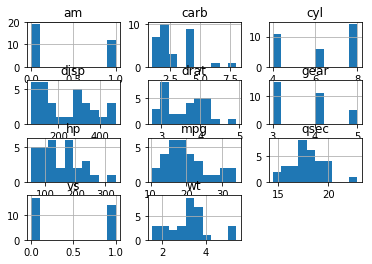

In [61]:
df.hist()
plt.show()

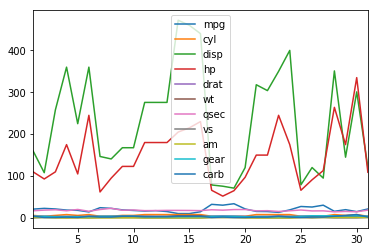

In [62]:
df.plot()
plt.show()

----------------------
### Additional Resources:

I found another cool little cheat sheet on advanced pandas concepts that can be found here:

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

And some more advanced topics here:

https://towardsdatascience.com/be-a-more-efficient-data-scientist-today-master-pandas-with-this-guide-ea362d27386